# Practical Machine Learning Course Project
## Yanal Kashou  

## Introduction
### 1. Source for this project available here:
The source for the training data is:
https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv  
The source for the test data is:
https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv 

### 2. Credit
Many thanks to the authors for providing this dataset for free use.   http://groupware.les.inf.puc-rio.br/har  
Velloso, E.; Bulling, A.; Gellersen, H.; Ugulino, W.; Fuks, H. __Qualitative Activity Recognition of Weight Lifting Exercises__.  
Proceedings of 4th International Conference in Cooperation with SIGCHI (Augmented Human '13) . Stuttgart, Germany: ACM SIGCHI, 2013. 

## Synopsis
In this project we are going to attempt to predict the testing dataset provided through the link above, through the training dataset also provided.  

Our first step will be to load the necessary libraries for our analysis.  

Our second step will be to read the data, partition the training dataset into 60% training and 40% validation.  

Next we need to clean it from any NA values or anomalies, and reduce it to a workable size.  

Our third step is to implement various machine learning algorithms, namely Decision Tree, Random Forest and Support Machine Vector to predict the testing dataset.  

Our fourth step is to assess the performance and accuracy of these methods.  

Our fifth and final step is to use the algorithm with the highest accuracy to effectively and accurately predict the test dataset provided.  


In [21]:
library(caret) #For training datasets and applying machine learning algorithms
library(ggplot2) #For awesome plotting
library(rpart)
library(rpart.plot)
library(rattle)
library(randomForest)
library(e1071)
library(dplyr)
set.seed(111)

## Data Loading, Cleaning and Partitioning
### 1. Loading and Reading

In [22]:
# We will use url0 for the training dataset and url1 for the testing dataset
url0 <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv" 
url1 <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv"

# Download and read datasets
train <- read.csv(url(url0))
test <- read.csv(url(url1))


### 2. Partitioning

In [23]:
#Partition the training data into 60% training and 40% validation and check dimensions.
trainIndex <- createDataPartition(train$classe, p = .60, list = FALSE)
trainData <- train[ trainIndex, ]
validData <- train[-trainIndex, ]

In [24]:
dim(trainData)

[1] 11776   160

In [25]:
dim(validData)

[1] 7846  160

### 3. Cleaning

In [26]:
# Both return 160 variables, many of which are filled with NA records
# If over 90% of a variable is filled with NA then it is omitted from the training and test datasets
trainData <- trainData[, colMeans(is.na(trainData)) < 0.1]
validData <- validData[, colMeans(is.na(validData)) < 0.1]
dim(trainData)
dim(validData)

# We can remove the first five colums which are ID columns, as well as the timestamp as we do not need it in this analysis.
trainData <- trainData[, -(1:5)]
validData <- validData[, -(1:5)]
dim(trainData)
dim(validData)

# We can also remove all variables with nearly zero variance
near.zero.var <- nearZeroVar(trainData)
trainData <- trainData[, -near.zero.var]
validData <- validData[, -near.zero.var]
dim(trainData)
dim(validData)

[1] 11776    93

[1] 7846   93

[1] 11776    88

[1] 7846   88

[1] 11776    54

[1] 7846   54

We have now managed to reduce the number of variables from 160 to 54 and since both the `validData` and `trainData` have an equal number of variables, we can implement our prediction algorithms in an easier fashion.

## Prediction Algorithms

We will be exploring three distinct machine learning algorithms:  
* Decision Tree (rpart)  
* Random Forest (randomForest)  
* Support Machine Vector (svm)  

### 1. Decision Tree (rpart)

In [27]:
mod.train.dt <- train(classe ~ ., method = "rpart", data = trainData)
mod.predict.dt <- predict(mod.train.dt, validData)
cm.dt <- confusionMatrix(mod.predict.dt, validData$classe)
print(mod.train.dt$finalModel)

n= 11776 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 11776 8428 A (0.28 0.19 0.17 0.16 0.18)  
   2) roll_belt< 130.5 10773 7430 A (0.31 0.21 0.19 0.18 0.11)  
     4) pitch_forearm< -33.55 953   10 A (0.99 0.01 0 0 0) *
     5) pitch_forearm>=-33.55 9820 7420 A (0.24 0.23 0.21 0.2 0.12)  
      10) roll_forearm< 124.5 6286 4116 A (0.35 0.24 0.15 0.19 0.067)  
        20) magnet_dumbbell_y< 437.5 5178 3063 A (0.41 0.18 0.18 0.17 0.059) *
        21) magnet_dumbbell_y>=437.5 1108  538 B (0.05 0.51 0.032 0.3 0.11) *
      11) roll_forearm>=124.5 3534 2452 C (0.065 0.21 0.31 0.21 0.21) *
   3) roll_belt>=130.5 1003    5 E (0.005 0 0 0 1) *


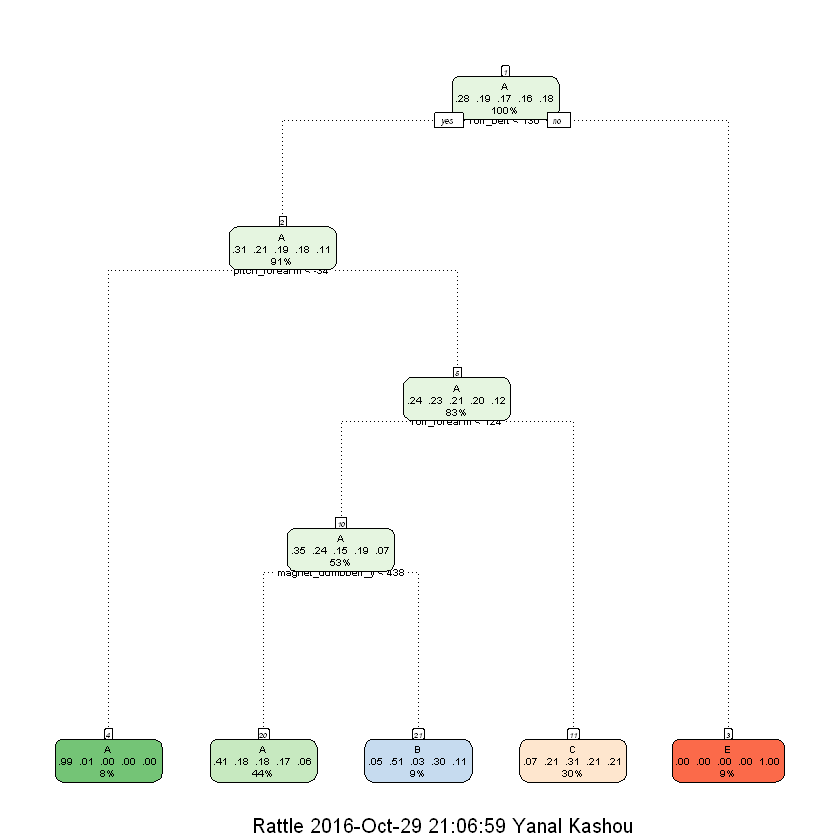

In [28]:
fancyRpartPlot(mod.train.dt$finalModel,cex=.5,under.cex=1,shadow.offset=0)

### 2. Random Forest
#### Using `randomForest` package with 10-Fold Cross-Validation

In [29]:
mod.train.rf <- randomForest(classe ~ ., data = trainData, mtry = 3, ntree = 200, do.trace = 25, cv.fold = 10)

ntree      OOB      1      2      3      4      5
   25:   1.66%  0.48%  2.59%  1.95%  2.75%  1.25%
   50:   0.76%  0.06%  1.10%  0.97%  1.66%  0.51%
   75:   0.59%  0.03%  0.92%  0.73%  1.30%  0.32%
  100:   0.48%  0.03%  0.53%  0.63%  1.30%  0.23%
  125:   0.47%  0.03%  0.48%  0.58%  1.30%  0.28%
  150:   0.47%  0.03%  0.48%  0.58%  1.30%  0.28%
  175:   0.49%  0.03%  0.48%  0.63%  1.40%  0.28%
  200:   0.46%  0.00%  0.44%  0.49%  1.45%  0.28%


In [30]:
mod.predict.rf <- predict(mod.train.rf, validData)
cm.rf <- confusionMatrix(mod.predict.rf, validData$classe)

In [31]:
# Variable Importance According to Random Forest
imp.rf <- importance(mod.train.rf)
imp.rf.arranged <- arrange(as.data.frame(imp.rf), desc(MeanDecreaseGini))
head(imp.rf.arranged, 15)

,MeanDecreaseGini
1,497.9939
2,480.9568
3,385.5397
4,331.5475
5,329.1098
6,322.7718
7,315.3276
8,282.9777
9,271.7181
10,239.5335


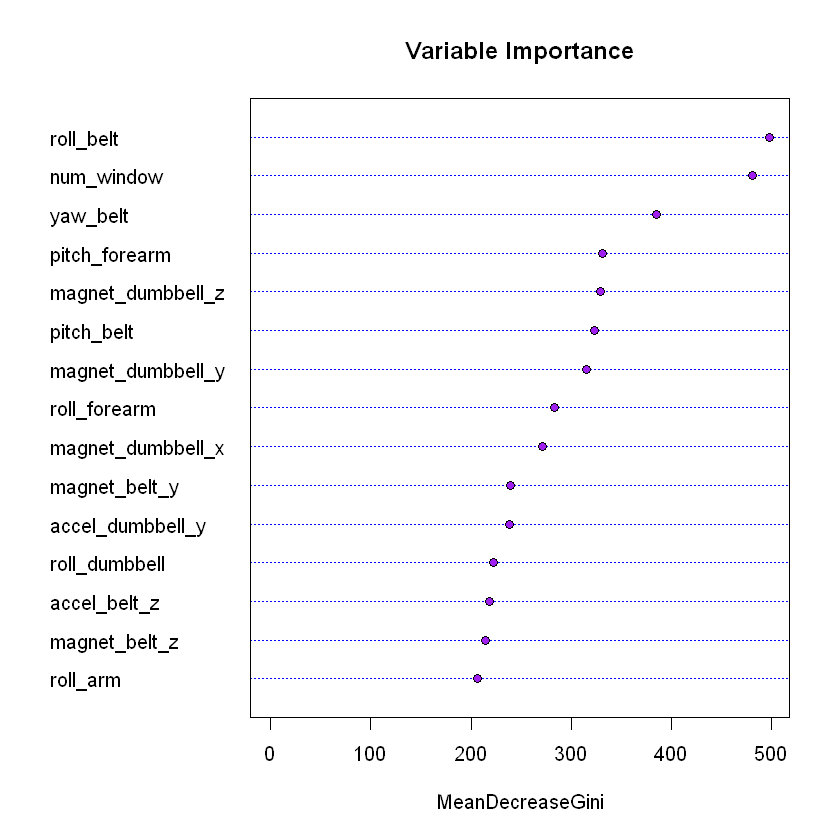

In [32]:
varImpPlot(mod.train.rf, n.var = 15, sort = TRUE, main = "Variable Importance", lcolor = "blue", bg = "purple")

### 3. Support Vector Machine

In [33]:
mod.train.svm <- svm(classe ~ ., data = trainData)
mod.predict.svm <- predict(mod.train.svm, validData)
cm.svm <- confusionMatrix(mod.predict.svm, validData$classe)

## Compare Accuracies

In [34]:
a.dt <- cm.dt$overall[1]
a.rf <- cm.rf$overall[1]
a.svm <- cm.svm$overall[1]

cm.dataframe <- data.frame(Algorithm = c("Decision Tree", "Random Forest", "Support Vector Machine"), Index = c("dt", "rf", "svm"), Accuracy = c(a.dt, a.rf, a.svm))
cm.dataframe <- arrange(cm.dataframe, desc(Accuracy))
cm.dataframe

,Algorithm,Index,Accuracy
1,Random Forest,rf,0.99400968646444
2,Support Vector Machine,svm,0.946342085138924
3,Decision Tree,dt,0.476803466734642


We can clearly see that Random Forest has the highest accuracy at ~ 99.4%, followed by Support Vector Machine at ~ 94.6%. Decision Tree gave us the lowest accuracy at ~ 47.7%.

## Errors
### In Sample Error

In [35]:
# In sample Error Rate
InSampError.rf <- (1 - 0.994)*100
InSampError.rf

[1] 0.6

We can see that the In Sample error is 0.6%

### Out of Sample Error

In [36]:
# Out of sample Error Rate
print(mod.train.rf)


Call:
 randomForest(formula = classe ~ ., data = trainData, mtry = 3,      ntree = 200, do.trace = 25, cv.fold = 10) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.46%
Confusion matrix:
     A    B    C    D    E class.error
A 3348    0    0    0    0 0.000000000
B    7 2269    3    0    0 0.004387889
C    0    9 2044    1    0 0.004868549
D    0    0   27 1902    1 0.014507772
E    0    0    1    5 2159 0.002771363


We can see that the OOB (Out of Bag) or Out of Sample Error of Random Forest with 10-Fold Cross Validation is 0.53%, which is consistent with the confusion matrix.

However, it is worthy to note that Random Forest OOB estimation does not require Cross Validation to decrease bias.

The In Sample Error is actually higher than the OOB, which is definitely considered an anomaly. It might be due to variance in the estimation of the error rates or due to overfitting. Nonetheless our prediction in the next section proves our model highly accurate.

## Final Prediction Using Random Forest

Prediction Results of Algorithm with Highest Accuracy (Random Forest)

In [37]:
fp.rf <- predict(mod.train.rf, newdata=test)
fp.rf

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 B  A  B  A  A  E  D  B  A  A  B  C  B  A  E  E  A  B  B  B 
Levels: A B C D E

Using Random Forest to predict our Testing Dataset is the best decision. And it accurately predicted all 20 cases.